# Introduction to Statistics in Python

### Libraries and datasets

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

food_consumption = pd.read_csv('datasets/food_consumption.csv')
amir_deals = pd.read_csv('datasets/amir_deals.csv')
restaurant_groups_dict = {'group_id':['A','B','C','D','E','F','G','H','I','J'], 'group_size':[2, 4, 6, 2, 2, 2, 3, 2, 4, 2]}
restaurant_groups = pd.DataFrame(restaurant_groups_dict)
world_happiness = pd.read_csv('datasets/world_happiness.csv')

## 1. Summary Statistics

### Mean and median
Instructions:
<ul>
<li>Import numpy with the alias np.</li>
<li>Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.</li>
<li>Calculate the mean and median of kilograms of food consumed per person per year for both countries.</li>
<li>Subset food_consumption for rows with data about Belgium and the USA.</li>
<li>Group the subsetted data by country and select only the consumption column.</li>
<li>Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().</li>
</ul>

In [9]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption.query('country == "Belgium"')

# Filter for USA
usa_consumption = food_consumption.query('country == "USA"')

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == "USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean','median']))

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64
              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.mean())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.median())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.mean())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\21985087

### Mean vs. median
Instructions:
<ul>
<li>Import matplotlib.pyplot with the alias plt.</li>
<li>Subset food_consumption to get the rows where food_category is 'rice'.</li>
<li>Create a histogram of co2_emission for rice and show the plot.</li>
<li>Use .agg() to calculate the mean and median of co2_emission for rice.</li>
</ul>

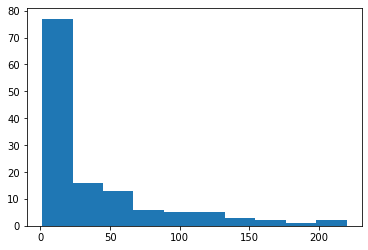

        Unnamed: 0  consumption  co2_emission
mean         718.5    29.375154     37.591615
median       718.5    11.875000     15.200000


C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2439675888.py:15: FutureWarning: ['country', 'food_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(rice_consumption.agg(['mean','median']))


In [15]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption.query('food_category == "rice"')

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg(['mean','median']))

### Quartiles, quantiles, and quintiles
Instructions:
<ul>
<li>Calculate the quartiles of the co2_emission column of food_consumption.</li>
<li>Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.</li>
<li>Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).</li>
</ul>

In [2]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance and standard deviation
Instructions:
<ul>
<li>Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.</li>
<li>Import matplotlib.pyplot with alias plt.</li>
<li>Create a histogram of co2_emission for the beef food_category and show the plot.</li>
<li>Create a histogram of co2_emission for the eggs food_category and show the plot.</li>
</ul>

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


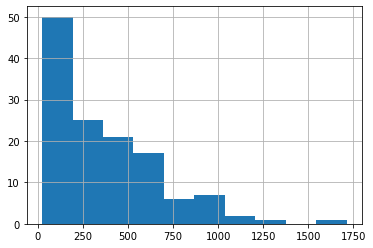

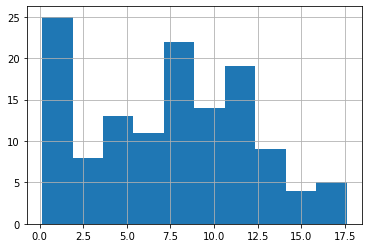

In [7]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

### Finding outliers using IQR
Instructions:
<ul>
<li>Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.</li>
<li>Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.</li>
<li>Calculate the interquartile range of emissions_by_country and store it as iqr.</li>
<li>Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.</li>
<li>Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.</li>
</ul>

In [8]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## 2. Random Numbers and Probability

### Calculating probabilities
Instructions:
<ul>
<li>Count the number of deals Amir worked on for each product type and store in counts.</li>
<li>Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.</li>
</ul>

In [10]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts/counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


### Sampling deals
Instructions:
<ul>
<li>Set the random seed to 24.</li>
<li>Take a sample of 5 deals without replacement and store them as sample_without_replacement.</li>
<li>Take a sample of 5 deals with replacement and save as sample_with_replacement.</li>
</ul>

In [13]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


### Creating a probability distribution
Instructions:
<ul>
<li>Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.</li>
<li>Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.</li>
<li>Reset the index of size_dist.</li>
<li>Rename the columns of size_dist to group_size and prob.</li>
<li>Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.</li>
<li>Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.</li>
</ul>

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
2.9000000000000004
0.30000000000000004


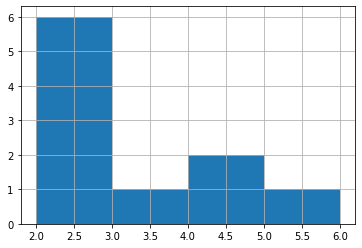

In [24]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show

# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / len(restaurant_groups)

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

# Calculate expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

### Data back-ups
Instructions:
<ul>
<li>To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.</li>
<li>Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.</li>
<li>Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.</li>
<li>Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.</li>
</ul>

In [25]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30)
print(prob_greater_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,0,30)
print(prob_greater_than_5)

0.16666666666666666
0.8333333333333334
0.8333333333333334


### Simulating wait times
Instructions:
<ul>
<li>Set the random seed to 334.</li>
<li>Import uniform from scipy.stats.</li>
<li>Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.</li>
<li>Create a histogram of the simulated wait times and show the plot.</li>
</ul>

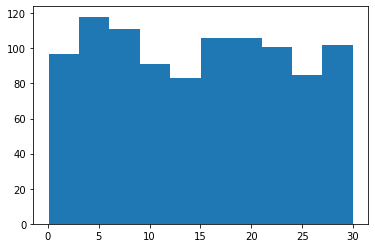

In [26]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### Simulating sales deals
Instructions:
<ul>
<li>Import binom from scipy.stats and set the random seed to 10.</li>
<li>Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.</li>
<li>Simulate a typical week of Amir's deals, or one week of 3 deals.</li>
<li>Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.</li>
<li>Print the mean number of deals he won per week.</li>
</ul>

In [27]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(deals)

[1]
[0]
[1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0
 1 1 2 0 2 1 1 0 2 0 0 1 0 2 0]


### Calculating binomial probabilities
Instructions:
<ul>
<li>What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.</li>
<li>What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.</li>
<li>What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.</li>
</ul>

In [28]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


### How many sales will be won?
Instructions:
<ul>
<li>Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.</li>
<li>Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.</li>
<li>Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.</li>
</ul>

In [29]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


## 3. More Distributions and the Central Limit Theorem

### Distribution of Amir's sales
Instructions:
<ul>
<li>Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.</li>
</ul>

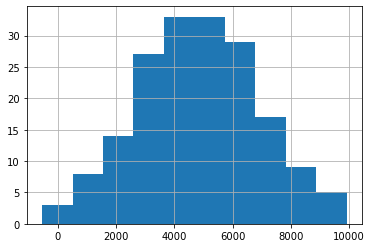

In [30]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

### Probabilities from the normal distribution
Instructions:
<ul>
<li>What's the probability of Amir closing a deal worth less than $7500?</li>
<li>What's the probability of Amir closing a deal worth more than $1000?</li>
<li>What's the probability of Amir closing a deal worth between $3000 and $7000?</li>
<li>What amount will 25% of Amir's sales be less than?</li>
</ul>

In [31]:
from scipy.stats import norm

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


### Simulating sales under new market conditions
Instructions:
<ul>
<li>Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.</li>
<li>Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.</li>
<li>Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.</li>
<li>Plot the distribution of the new_sales amounts using a histogram and show the plot.</li>
</ul>

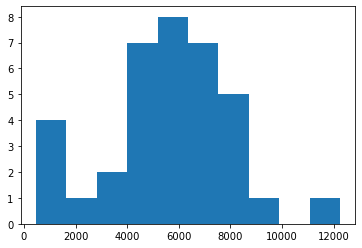

In [33]:
# Calculate new average amount
new_mean = 5000*1.2

# Calculate new standard deviation
new_sd = 2000*1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

### The CLT in action
Instructions:
<ul>
<li>Create a histogram of the num_users column of amir_deals and show the plot.</li>
<li>Set the seed to 104.</li>
<li>Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.</li>
<li>Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.</li>
<li>Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.</li>
</ul>

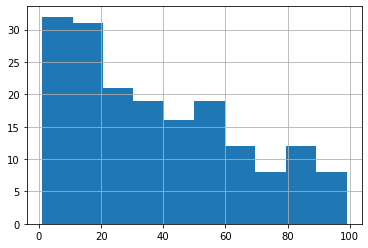

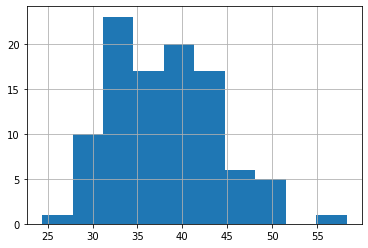

In [36]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### The mean of means
Instructions:
<ul>
<li>Set the random seed to 321.</li>
<li>Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.</li>
<li>Print the mean of sample_means.</li>
<li>Print the mean of the num_users column of amir_deals.</li>
</ul>

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(amir_deals['num_users'].mean())

### Tracking lead responses
Instructions:
<ul>
<li>Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.</li>
<li>Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?</li>
<li>What's the probability that Amir responds to 2 or fewer leads in a day?</li>
<li>What's the probability that Amir responds to more than 10 leads in a day?</li>
</ul>

In [42]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


### Modeling time between leads
Instructions:
<ul>
<li>Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?</li>
<li>What's the probability it takes Amir more than 4 hours to respond to a lead?</li>
<li>What's the probability it takes Amir 3-4 hours to respond to a lead?</li>
</ul>

In [45]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale = 2.5))

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


## 4. Correlation and Experimental Design

### Relationships between variables
Instructions:
<ul>
<li>Create a scatterplot of happiness_score vs. life_exp (without a trendline) using seaborn.</li>
<li>Show the plot.</li>
<li>Create a scatterplot of happiness_score vs. life_exp with a linear trendline using seaborn, setting ci to None.</li>
<li>Show the plot.</li>
<li>Calculate the correlation between life_exp and happiness_score. Save this as cor.</li>
</ul>

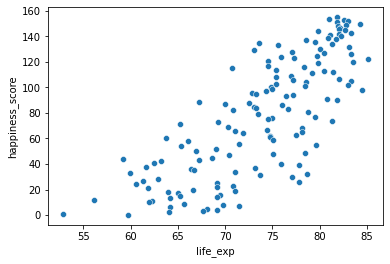

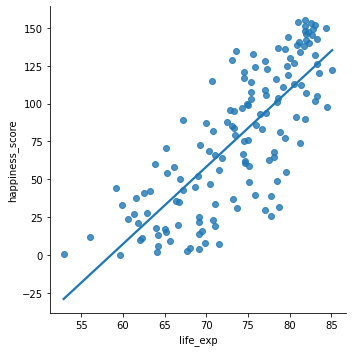

0.7802249053272061


In [49]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci = None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

### What can't correlation measure?
Instructions:
<ul>
<li>Create a seaborn scatterplot (without a trendline) showing the relationship between gdp_per_cap (on the x-axis) and life_exp (on the y-axis).</li>
<li>Show the plot</li>
<li>Calculate the correlation between gdp_per_cap and life_exp and store as cor.</li>
</ul>

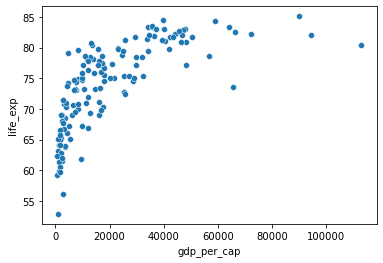

0.7019547642148014


In [50]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

### Transforming variables
Instructions:
<ul>
<li>Create a scatterplot of happiness_score versus gdp_per_cap and calculate the correlation between them.</li>
<li>Add a new column to world_happiness called log_gdp_per_cap that contains the log of gdp_per_cap.</li>
<li>Create a seaborn scatterplot of log_gdp_per_cap and happiness_score and calculate the correlation between them.</li>
</ul>

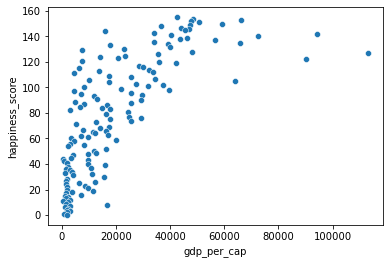

0.7279733012222975


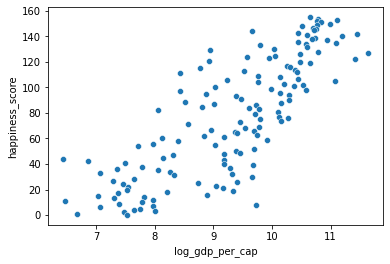

0.8043146004918288


In [51]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

### Does sugar improve happiness?
Instructions:
<ul>
<li>Create a seaborn scatterplot showing the relationship between grams_sugar_per_day (on the x-axis) and happiness_score (on the y-axis).</li>
<li>Calculate the correlation between grams_sugar_per_day and happiness_score.</li>
</ul>

In [ ]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day',y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)